In [ ]:
import pandas as pd
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = pd.read_csv('IMDB_Dataset.csv')

In [ ]:
dataset['s_score'] = [1 if item == "positive" else 0 for item in dataset['sentiment']]
dataset = dataset.drop('sentiment', axis=1)
dataset

,review,s_score
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


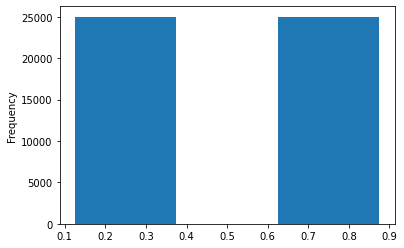

In [ ]:
dataset['s_score'].plot.hist(bins=2, rwidth=0.5)

In [ ]:
dataset

,review,s_score
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['review'])
test_vectors = vectorizer.transform(test['review'])

In [ ]:
#train
from sklearn.svm import SVC

In [ ]:
sentiment_classifier = SVC(kernel='linear', probability=True)
sentiment_classifier.fit(train_vectors, train['s_score'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
test_prediction = sentiment_classifier.predict(test_vectors)
from sklearn.metrics import classification_report
test_report = classification_report(test['s_score'], test_prediction, output_dict=True)

In [ ]:
test_report

{'0': {'f1-score': 0.9018093108355357,
  'precision': 0.9095755587451302,
  'recall': 0.8941745615803266,
  'support': 4961},
 '1': {'f1-score': 0.9049399724463688,
  'precision': 0.8975209837985555,
  'recall': 0.9124826354435404,
  'support': 5039},
 'accuracy': 0.9034,
 'macro avg': {'f1-score': 0.9033746416409523,
  'precision': 0.9035482712718428,
  'recall': 0.9033285985119335,
  'support': 10000},
 'weighted avg': {'f1-score': 0.9033868512212346,
  'precision': 0.9035012584295513,
  'recall': 0.9034,
  'support': 10000}}

In [ ]:
train_prediction = sentiment_classifier.predict(train_vectors)
from sklearn.metrics import classification_report
train_report = classification_report(train['s_score'], train_prediction, output_dict=True)

In [ ]:
train_report

{'0': {'f1-score': 0.9573141726960919,
  'precision': 0.960560691318328,
  'recall': 0.9540895254254205,
  'support': 20039},
 '1': {'f1-score': 0.9574356541927754,
  'precision': 0.95421974522293,
  'recall': 0.9606733129602726,
  'support': 19961},
 'accuracy': 0.957375,
 'macro avg': {'f1-score': 0.9573749134444336,
  'precision': 0.957390218270629,
  'recall': 0.9573814191928465,
  'support': 40000},
 'weighted avg': {'f1-score': 0.9573747949999742,
  'precision': 0.9573964006930721,
  'recall': 0.957375,
  'support': 40000}}

In [ ]:
import pickle

In [ ]:
pickle.dump(sentiment_classifier, open("Sentiment_SVM", 'wb'))

In [ ]:
sentiment_classifier.predict(vectorizer.transform(['google are a good company']))

1

In [ ]:
sentiment_classifier.predict(vectorizer.transform(['google are a bad company']))[0]

In [ ]:
dataset_in = pd.read_csv('GOOG_PRICE_NEWS.csv')
dataset_in.iloc[:] = dataset_in.iloc[::-1].values
DATASET = dataset_in
DATASET

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,-0.003302,1,0,2,['steve jobs described apples rivalry with goo...
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,-0.007665,1,0,1,['google appeals youtube blackout in turkish c...
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.002118,0,1,1,"['google checks in to the hotel business, addi..."
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.023608,1,0,6,['follow our live blog of googles q1 earnings ...
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.017569,0,1,2,"['in 2007, sergey brin wrote to google execs, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.001553,0,1,1,['democratic sen ron wyden asked google chief ...
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.002861,0,1,3,['google told advertisers it is planning to li...
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.000693,1,0,1,['google will test an option for employees to ...
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.013366,1,0,2,['a pair of sweeping antitrust lawsuits agains...


In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scaler(dataset):
    scaler = MinMaxScaler(feature_range=(-1,1))
    dataset['sentiment'] = scaler.fit_transform(dataset['sentiment'].values.reshape(-1,1))
    dataset['log_change'] = scaler.fit_transform(dataset['log_change'].values.reshape(-1,1))
    return dataset

In [ ]:
from ast import literal_eval
s_scores = []
#do some sentiment predction on twitter dataset
for index in range(len(DATASET['WALL_STREE.text_last1days:google'])): 
    score = 0
    for item in literal_eval(DATASET['WALL_STREE.text_last1days:google'][index]):
        if(sentiment_classifier.predict(vectorizer.transform([item]))[0] == 0):
            score += sentiment_classifier.predict_proba(vectorizer.transform([item]))[0][0] * -1
        else:
            score += sentiment_classifier.predict_proba(vectorizer.transform([item]))[0][0]
    s_scores.append(score)
s_scores

[-0.479429789860066,
 0.22400962803495517,
 0.34586113924463785,
 0.5814277819382525,
 -1.3846125373386662,
 0.4925967989753337,
 -0.8367444582725458,
 0.142135836347388,
 -0.7394856184063213,
 0.5848827588928661,
 -0.7346494026158216,
 -0.43641762800742656,
 -0.35398384644027,
 -0.18285313798654113,
 -0.7355655256025593,
 0.6275611885166219,
 -1.03972765356899,
 -0.8914734475189887,
 0.07998732479596776,
 0.37266516110983483,
 0.02170658663268088,
 -0.7179665966591895,
 0.8798290733493574,
 0.30074095854254973,
 0.1878960963529252,
 -1.4106180423346932,
 0.19180303472998123,
 0.15885103436330272,
 0.43368287046841625,
 0.8538632023681483,
 -0.5497775144760224,
 -0.5955860185825673,
 -0.5206077450824083,
 0.40975711960225214,
 -0.6785508475053825,
 0.45255927580255817,
 0.0618516954200697,
 -0.6472194611613998,
 0.5,
 0.36952483269706543,
 0.2532031721371373,
 -0.43221455819372306,
 0.3840157686975062,
 0.8225479841892664,
 0.3100367541610003,
 -0.5345584361369567,
 -0.6351290200588572

In [ ]:
my_model_dataset = DATASET.copy()

In [ ]:
my_model_dataset.loc[:,'sentiment'] = s_scores

In [ ]:
scaler(my_model_dataset)

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google,sentiment
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,0.166128,1,0,2,['steve jobs described apples rivalry with goo...,0.047923
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,0.071418,1,0,1,['google appeals youtube blackout in turkish c...,0.415801
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.283769,0,1,1,"['google checks in to the hotel business, addi...",0.479525
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.274617,1,0,6,['follow our live blog of googles q1 earnings ...,0.602720
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.619104,0,1,2,"['in 2007, sergey brin wrote to google execs, ...",-0.425460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.271485,0,1,1,['democratic sen ron wyden asked google chief ...,0.371693
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.299884,0,1,3,['google told advertisers it is planning to li...,0.873099
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.252829,1,0,1,['google will test an option for employees to ...,-0.092425
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.052315,1,0,2,['a pair of sweeping antitrust lawsuits agains...,0.621750


In [ ]:
my_model_dataset.to_csv("GOOG_PRICE_MYMODEL_SEMANTIC_ENRICHED.csv", index=False)